# Applying K-means to a synthetic 2d datasets with n clusters

To determine how well a k-means clustering can identify and classify this dataset into n clusters.

To start we will pick n=4. This number can change later depending on our result and requirements

In [1]:
import os
# set the omp_num_threads environment variable to '2'
os.environ['omp_num_threads'] = '2' # this is important in some system while implementing k-means because we are going to have different threads in our computer . And if there is an unknown bug in the libraray so by putting this at the beggining of the code ,nothing else on the computer will be impacted 

In [54]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic data with 4 centres (blobs)

X, y_true = make_blobs(n_samples = 300, centers=4, cluster_std=0.60, random_state=0) # can play with size of the n_samples,centers, cluster and see different output

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data with 4 blobs")
plt.show()

Applying K-means clustering

Here one can change the number of targeted clusters

In [ ]:
# pip install --upgrade threadpoolctl

In [67]:
# apply k-means with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10) # we created an object name kmeans to fit our cluster into data.n_init means how many time do you want algorithm to try to fit our data to achieve convergence with 4 clusters
#now that we have our object, we willl fix our object to data
kmeans.fit(X) # here only put X and not y because this is unsupervised learning


KMeans(n_clusters=4, n_init=10)

In [ ]:
# now we can predict with new data where to, in which cluster new data should be allocated
y_kmeans = kmeans.predict(X) # this is prediction function to predict new data. Here argument X has been passed because for this example we are predicting our existing data only but this can change

#to visualise the predicted data
plt.scatter(X[:, 0], X[:,1],c=y_kmeans,cmap='viridis')
#plt.show()
# we can also find centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=100, alpha=0.75,marker='X')
plt.title("data with k-means cluster Labels")
plt.show()


## How to guess the value of K? 

In our example we defined number of k but in real world this wont be possible and we will have to find a way to teach machine how to find suitable number of K

- We compute the clustering for several values of K,
- Compute a score for each of them (we use the inertia score, there are others)
- Plot the scores vs the number K. This score is a good indicator to tell where have hit the right number of K and if I add more after that point then i start to degrade the performance of score
- Search for an elbow in the graph


In [78]:
# lets start to find the k

from sklearn.cluster import KMeans

# Determine the inertia for k from 2 to 10
Inertia_score = [] # we will create an empty list and then at each iteration I can append the new value I find  
K_range = range(2,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=123)
    kmeans=kmeans.fit(X)
    Inertia_score.append(kmeans.inertia_)

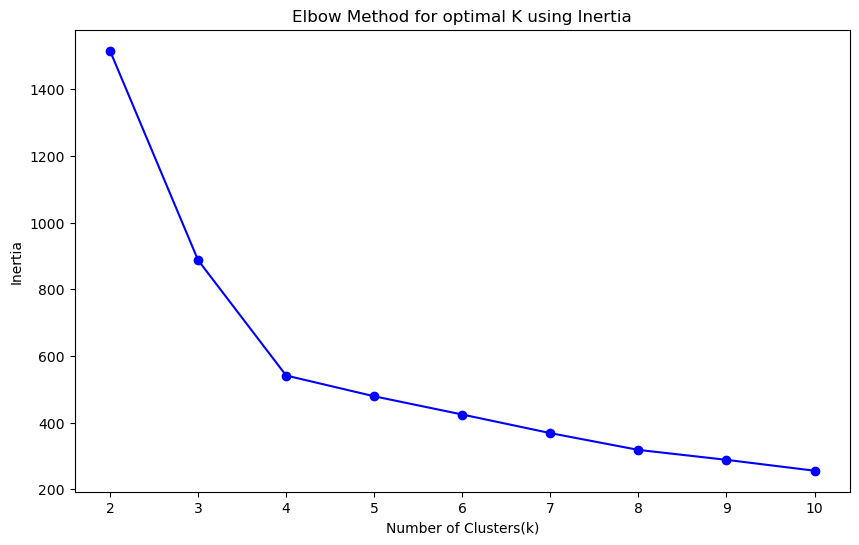

In [81]:
# plotting all the values of inertia means plotting the elbow grapgh using Inertia
plt.figure(figsize=(10,6))
plt.plot(K_range, Inertia_score, 'bo-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K using Inertia')
plt.show()

We can use other scores such as SILHOUETTE

In [82]:
from sklearn.metrics import silhouette_score

silhouette_scores =[] # instead of inertia score like in elbow method here we calculate silhouette score
K_range = range(2,11) # Testing for k from 2 to 20

for k in K_range:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=123)
    cluster_labels= kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

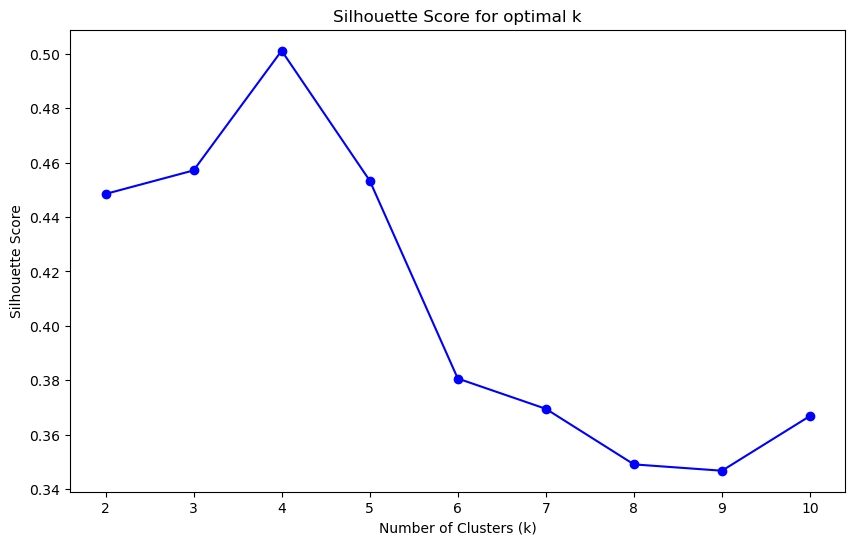

In [83]:
# plotting the silhouette scores
plt.figure(figsize=(10,6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for optimal k')
plt.show()

from above plot we can say that silhouette value is higher for most suitable k which is 4 for this dataset
so for elbow we are looking in change of behaviour means(sudden drop or up) which in our case seemed at k =4 in previous plot.
and for silhouette we look for k that has  maximum value to find suitable number of clusters so in our experiment we see that both both plot silhouette and elbow method we got the value 4 which indicates strongly if I had didn't know how many blobs I created, I an still infer or guess that there are 4 different clusters in our dataset. We can check this by changing k value again and again and see if both gives same result or not. As warning we need to keep in mind that its not always to find how many exact clusters do our data have. So have to keep using different scores to gain confidence thats the right number of cluster Silhouette however always gives stronger indication that elbow method.